### Prevendo a autonomia de um carro com base no seu peso

### Importando as bibliotecas básicas

In [90]:
import pandas as pd
import numpy as np

### Importando bibliotecas para geração de gráficos

In [91]:
import matplotlib.pyplot as plt

### Bibliotecas para o aprendizado de máquina

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor 

### Carregando o Dataset

In [93]:
dataset = pd.read_csv("../input/autompg-dataset/auto-mpg.csv")


In [94]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'Relação entre os pesos e a autonomia dos veiculos')

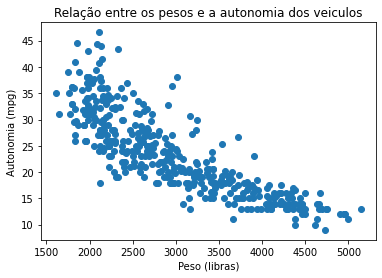

In [95]:
plt.scatter(dataset[["weight"]], dataset[["mpg"]])
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("Relação entre os pesos e a autonomia dos veiculos")

#### Podemos observar no gráfico, que existe uma tendência da tendência diminuir a medida que o peso do veículo aumenta, o objetivo é, a partir de novo peso como podemos prever sua autonomia?

### O primeiro passo é fazer o pré-processamento dos dados de entrada  

In [96]:
X = dataset[["weight"]]
Y = dataset[["mpg"]]

#### Convertendo as medidas de libras para kg e milhas por galão para km por litro

In [97]:
print(X["weight"])
X["weight"] = X["weight"] * 0.453592
print(X["weight"])
print(Y["mpg"])
Y["mpg"] = Y["mpg"] * 0.425144
print(Y["mpg"])

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64
0      1589.386368
1      1675.115256
2      1558.542112
3      1557.181336
4      1564.438808
          ...     
393    1265.521680
394     966.150960
395    1040.993640
396    1190.679000
397    1233.770240
Name: weight, Length: 398, dtype: float64
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64
0       7.652592
1       6.377160
2       7.652592
3       6.802304
4       7.227448
         ...    
393    11.478888
394    18.706336
395    13.604608
396    11.904032
397    13.179464
Name: mpg, Length: 398, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [98]:
X


,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [99]:
X.describe()

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


### Normalização

In [100]:
escala = StandardScaler()
escala.fit(X)


X_norm = escala.transform(X)

### Dividir o conjunto em treinamento e teste

In [101]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.3)

### Processamento 

In [102]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                  max_iter=2000,
                  tol=0.0000001,
                  learning_rate_init=0.1,
                  solver="sgd",
                  activation="logistic",
                  learning_rate = "constant",
                  verbose =2,
                  )

In [103]:
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 49.75561553
Iteration 2, loss = 7.11793156
Iteration 3, loss = 8.30140545
Iteration 4, loss = 5.51641222
Iteration 5, loss = 5.25703311
Iteration 6, loss = 5.14614342
Iteration 7, loss = 4.94682136
Iteration 8, loss = 4.47940455
Iteration 9, loss = 3.49684461
Iteration 10, loss = 2.64197346
Iteration 11, loss = 2.12785818
Iteration 12, loss = 2.00889022
Iteration 13, loss = 1.83599254
Iteration 14, loss = 1.80158032
Iteration 15, loss = 1.82115420
Iteration 16, loss = 1.81222088
Iteration 17, loss = 1.78987304
Iteration 18, loss = 1.74819779
Iteration 19, loss = 1.66502155
Iteration 20, loss = 1.63704685
Iteration 21, loss = 1.62223108
Iteration 22, loss = 1.61116466
Iteration 23, loss = 1.59117272
Iteration 24, loss = 1.56757222
Iteration 25, loss = 1.56421172
Iteration 26, loss = 1.56801184
Iteration 27, loss = 1.56173230
Iteration 28, loss = 1.53447327
Iteration 29, loss = 1.55524490
Iteration 30, loss = 1.52108910
Iteration 31, loss = 1.53353628
Iteration 32, lo

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
             verbose=2)

In [104]:
reglinear = SGDRegressor(max_iter = 2000,
                        tol = 0.0000001,
                        eta0=0.1, 
                        learning_rate= "constant",
                        verbose=2,
                        )

In [105]:
reglinear.fit(X_norm_train, Y_train)

-- Epoch 1
Norm: 2.82, NNZs: 1, Bias: 11.169188, T: 278, Avg. loss: 2.665201
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.07, NNZs: 1, Bias: 10.146477, T: 556, Avg. loss: 1.836195
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.43, NNZs: 1, Bias: 9.913117, T: 834, Avg. loss: 1.775701
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.95, NNZs: 1, Bias: 9.455398, T: 1112, Avg. loss: 1.784521
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.97, NNZs: 1, Bias: 10.121973, T: 1390, Avg. loss: 1.805406
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.32, NNZs: 1, Bias: 10.043065, T: 1668, Avg. loss: 1.805178
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.05, NNZs: 1, Bias: 9.871128, T: 1946, Avg. loss: 1.779900
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.56, NNZs: 1, Bias: 9.900310, T: 2224, Avg. loss: 1.805176
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

### Pós-Processamento


In [106]:
# Previsão do conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [107]:
# Calcular o R^2
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test, Y_rl_previsao)

print(f"R2 RNA: {r2_rna}")
print(f"R2 RL: {r2_rl}")

R2 RNA: 0.6877598081290057
R2 RL: 0.6630404350649463


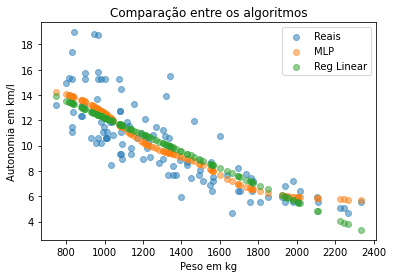

In [108]:
X_test = escala.inverse_transform(X_norm_test)


plt.scatter(X_test, Y_test, alpha=0.5, label = "Reais")
plt.scatter(X_test, Y_rna_previsao, alpha= 0.5, label="MLP")
plt.scatter(X_test, Y_rl_previsao, alpha=0.5, label="Reg Linear")
plt.xlabel("Peso em kg")
plt.ylabel("Autonomia em km/l")
plt.title("Comparação entre os algoritmos")
plt.legend(loc=1)

### Prever um novo dado

In [109]:
X_futuro = np.array([[1250]])

X_futuro_norm = escala.transform(X_futuro.T)



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [110]:
y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

In [111]:
print(f"RNA: {y_rna_prev_futuro}")
print(f"Regressão Linear: {y_reglinear_prev_futuro}")

RNA: [9.88091417]
Regressão Linear: [10.54929506]


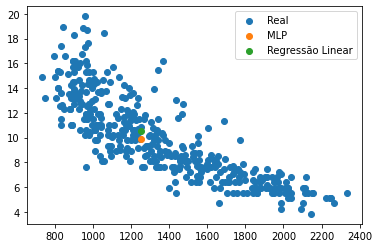

In [113]:
plt.scatter(X, Y, label = "Real")
plt.scatter(X_futuro, y_rna_prev_futuro, label = "MLP")
plt.scatter(X_futuro, y_reglinear_prev_futuro, label = "Regressão Linear")
plt.legend(loc=1)